<a href="https://colab.research.google.com/github/challhaymen/material-dashboard-laravel/blob/master/Projet_n8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install --quiet gspread pandas gspread_dataframe isodate wordcloud seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.ticker as ticker
import isodate
import re
import nltk
nltk.download('stopwords')

import gspread
from gspread_dataframe import get_as_dataframe
from google.oauth2.service_account import Credentials

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Path to your uploaded JSON credentials file
SERVICE_ACCOUNT_FILE = '/content/your-service-account.json'

# Define the required scopes
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# Authorize with service account
creds = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(creds)

# Access the Google Sheet by its ID
sheet_id = '1igY5fvUSGeu8Y99ZpO05Qi4IeB_y9pV4tDYqMuj9bts'  # e.g. '1AbCDEfGhiJKLmnOPQrStuvWxyZ0123456789'
sheet = client.open_by_key(sheet_id)
worksheet = sheet.worksheet('video_df')  # or any other sheet name

# Load as DataFrame
video_df = get_as_dataframe(worksheet)

In [ ]:
video_df

,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDayName,durationSecs,tagCount
0,Ali Abdaal,Here's How to Get to the Top 1% (Discipline Is...,Check out Spotter to brainstorm better video i...,"Ali Abdaal, Ali abdal, Joe Hudson",2025-05-09T16:23:47Z,246009.0,9717.0,0.0,533.0,PT1H9M34S,hd,0.0,Friday,4174.0,0.0
1,Ali Abdaal,17 Cheap Purchases That Actually Improved My Life,Check out DeleteMe using my link and get 20% o...,"Ali Abdaal, Ali abdal",2025-05-03T13:01:19Z,167315.0,5120.0,0.0,377.0,PT16M25S,hd,0.0,Saturday,985.0,0.0
2,Ali Abdaal,How To Get Rich,"💌 Join LifeNotes, my weekly email where I shar...","Ali Abdaal, Ali abdal",2025-04-18T15:00:51Z,612303.0,28858.0,0.0,1760.0,PT28M7S,hd,0.0,Friday,1687.0,0.0
3,Ali Abdaal,Why Everyone Should Start a YouTube Channel,Bring your videos to life with music from Epid...,"Ali Abdaal, youtube, grow on youtube 2025",2025-04-11T15:00:36Z,180089.0,7676.0,0.0,783.0,PT15M46S,hd,0.0,Friday,946.0,0.0
4,Ali Abdaal,Watch this if you feel like you’re behind in life,Head over to Brilliant for 20% off their annua...,"Ali Abdaal, Ali abdal",2025-04-04T13:01:13Z,88763.0,3103.0,0.0,130.0,PT19M12S,hd,0.0,Friday,1152.0,0.0
5,Ali Abdaal,Honest YouTube Advice for 45 Minutes Straight ...,Join Spotter’s Challenge before 31st March 202...,"Ali Abdaal, Ali abdal",2025-03-28T16:18:00Z,54733.0,1772.0,0.0,167.0,PT44M42S,hd,0.0,Friday,2682.0,0.0
6,Ali Abdaal,How to Make More Money in your Job,🙋‍♂️ Download my Powerful Questions prompt she...,"Ali Abdaal, Ali abdal",2025-03-25T16:40:00Z,114035.0,4183.0,0.0,267.0,PT25M8S,hd,0.0,Tuesday,1508.0,0.0
7,Ali Abdaal,Watch this if you never have enough time,Thanks to Shopify for sponsoring this video. G...,"Ali Abdaal, Ali abdal",2025-03-18T14:00:09Z,152894.0,5311.0,0.0,195.0,PT14M34S,hd,0.0,Tuesday,874.0,0.0
8,Ali Abdaal,What to do if you hate your job,Head over to Brilliant for a 30 day free trial...,"Ali Abdaal, Ali abdal",2025-03-11T14:00:36Z,196053.0,5554.0,0.0,272.0,PT21M27S,hd,0.0,Tuesday,1287.0,0.0
9,Ali Abdaal,How to Find Your Purpose (with Tiny Experiments),Check out Spotter to brainstorm better video i...,"Ali Abdaal, Ali abdal",2025-03-04T14:30:33Z,230876.0,8611.0,0.0,315.0,PT22M27S,hd,0.0,Tuesday,1347.0,0.0


In [ ]:
# Convert columns
video_df['viewCount'] = video_df['viewCount'].astype(int)
video_df['likeCount'] = video_df['likeCount'].astype(int)
video_df['commentCount'] = video_df['commentCount'].astype(int)
video_df['favouriteCount'] = video_df['favouriteCount'].astype(int)
video_df['tagCount'] = video_df['tagCount'].astype(int)
video_df['durationSecs'] = video_df['durationSecs'].astype(float)
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

# Convert to datetime if needed
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'], errors='coerce')

# If day name is expected to be a category
video_df['publishedDayName'] = video_df['publishedDayName'].astype('category')

<ipython-input-9-d46533317219>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


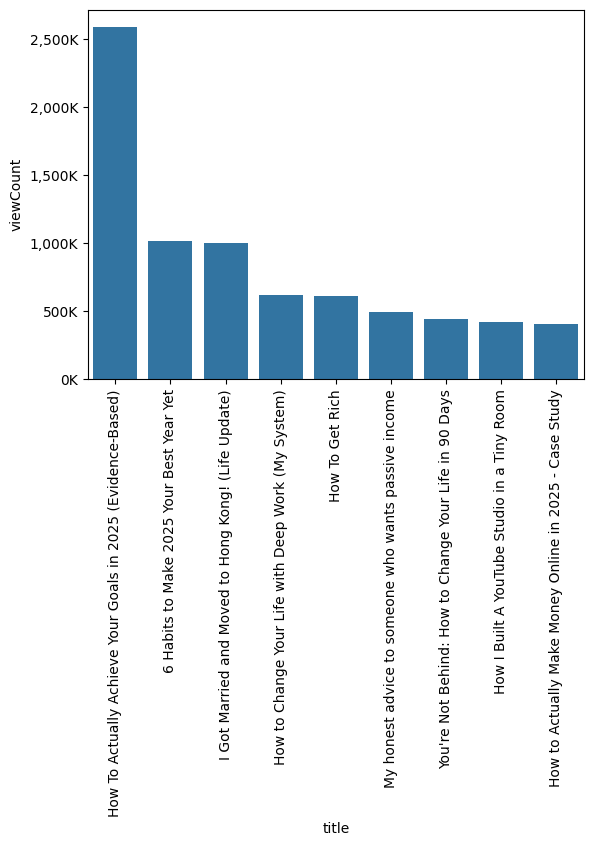

In [ ]:
### Best performing videos
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<ipython-input-10-715a598c1ad2>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128123 (\N{GHOST}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128582 (\N{FACE WITH OK GESTURE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12

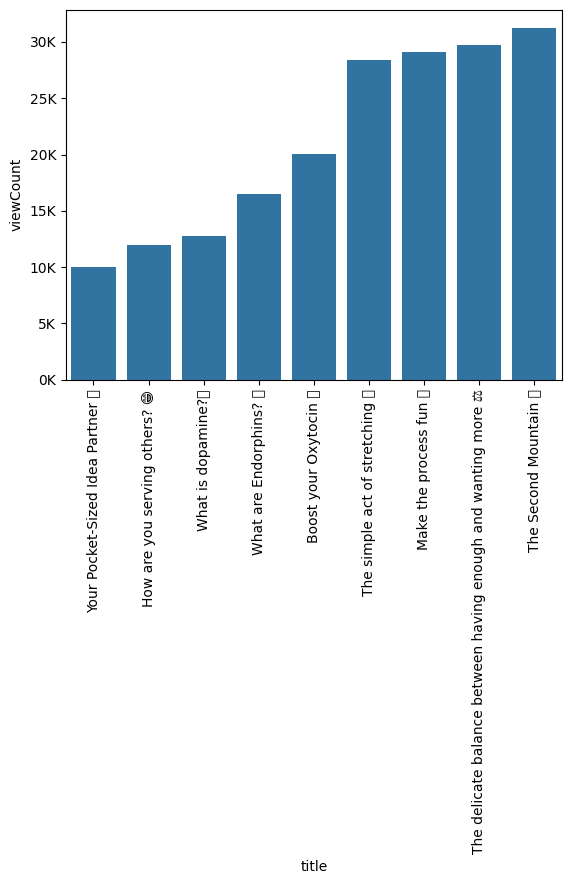

In [ ]:
### Worst performing videos
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: xlabel='channelTitle', ylabel='viewCount'>

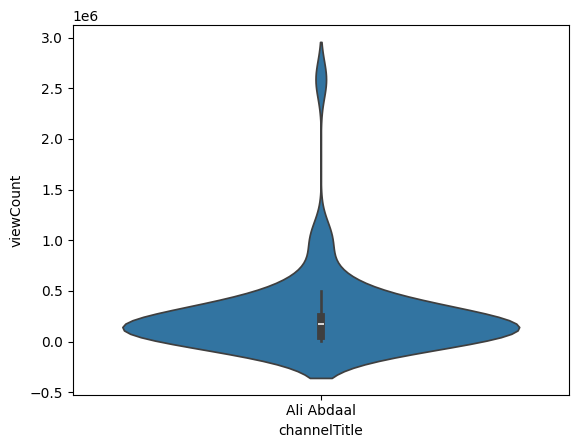

In [ ]:
### View distribution per video
sns.violinplot(x=video_df["channelTitle"], y=video_df["viewCount"])

<Axes: xlabel='likeCount', ylabel='viewCount'>

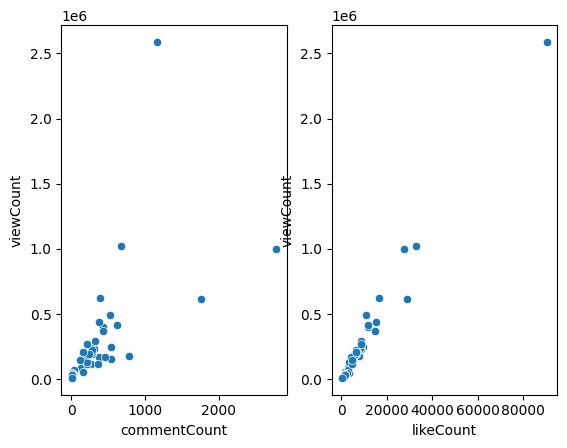

In [ ]:
### Views vs. likes and comments
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

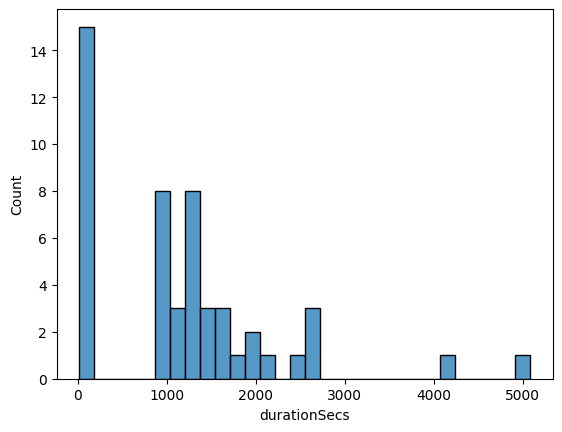

In [ ]:
### Video duration
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

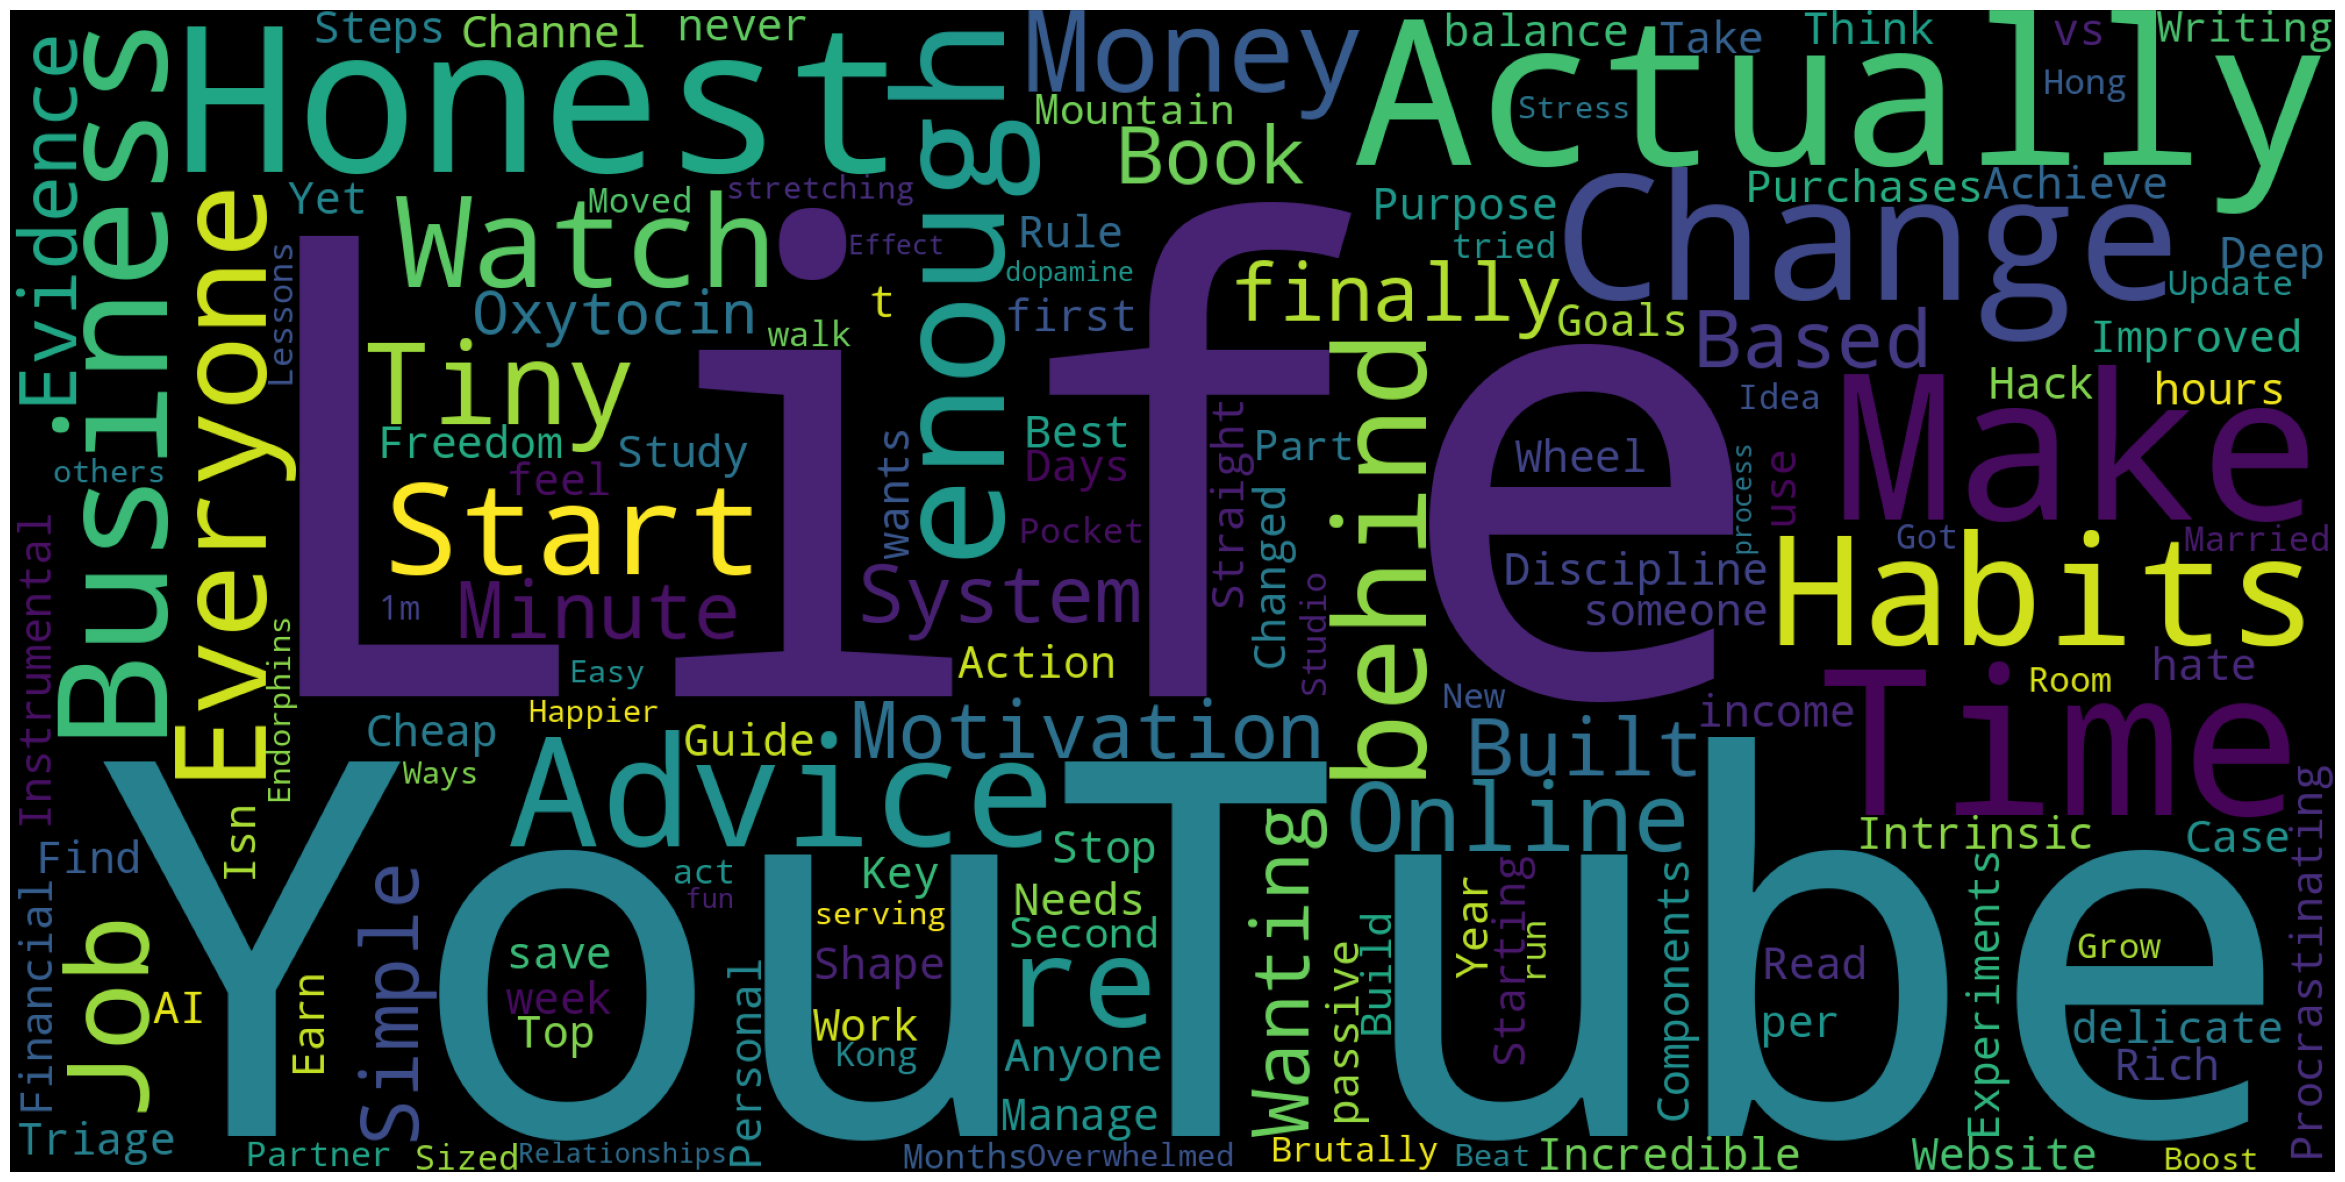

In [ ]:
### Wordcloud for video titles
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

<ipython-input-15-808d4fef286d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day', y='count', data=day_counts, palette='viridis')


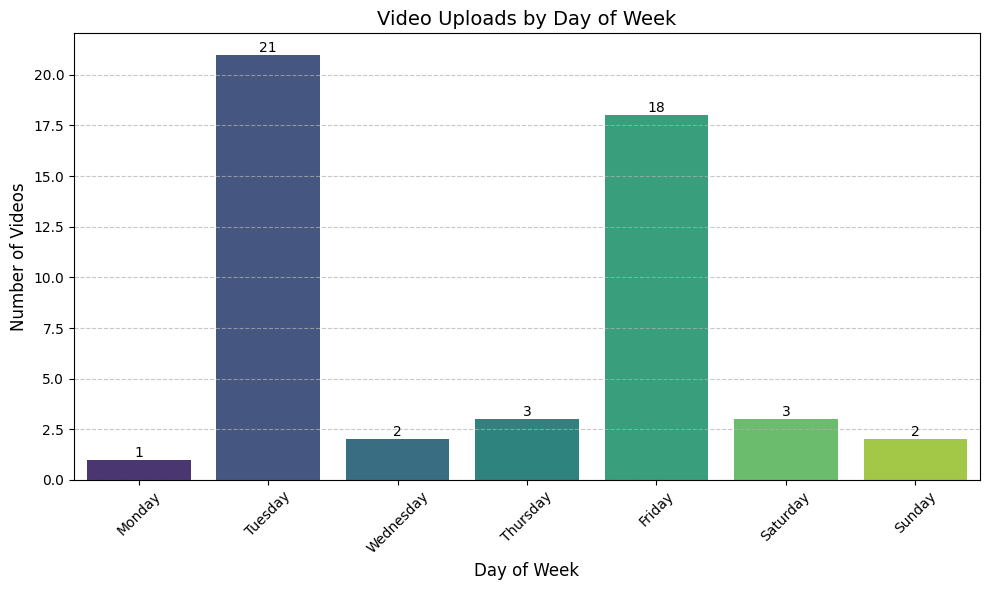

In [ ]:
# Prepare the data
day_counts = video_df['publishedDayName'].value_counts().rename_axis('day').reset_index(name='count')

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to categorical and sort
day_counts['day'] = pd.Categorical(day_counts['day'], categories=weekday_order, ordered=True)
day_counts = day_counts.sort_values('day')

# Fill missing days (if any) with 0 counts
all_days = pd.DataFrame({'day': weekday_order})
day_counts = all_days.merge(day_counts, on='day', how='left').fillna(0)

# Create the visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='day', y='count', data=day_counts, palette='viridis')

# Customize the plot
plt.title('Video Uploads by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.xticks(rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()